In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [206]:
file_path_trainC = "../TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx"
train_cat = pd.read_excel(file_path_trainC)
train_cat.head()

participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   00aIpNTbG5uh                     2019                       4   
1   00fV0OyyoLfw                     2017                       1   
2   04X1eiS79T4B                     2017                       1   
3   05ocQutkURd6                     2018                       1   
4   06YUNBA9ZRLq                     2018                       1   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               1.0                          0.0   
1                               0.0                          9.0   
2                               1.0                          2.0   
3                               3.0                          8.0   
4                               0.0                          1.0   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                      3.0                    21.0                    45.0   
1                      2.0                    21.0                     0.0   
2                      2.0                     9.0                     0.0   
3                      2.0                    18.0                    10.0   
4                      2.0                    12.0                     0.0   

   Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
0                     NaN                     NaN  
1                    21.0                    45.0  
2                     NaN                     NaN  
3                    18.0                     0.0  
4                     NaN                     NaN

In [207]:
# Functional Connectome Matrices

file_path_trainFCM = "../TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"
train_FCM = pd.read_csv(file_path_trainFCM)

train_FCM.head()

participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.222930          0.527903          0.429966   
1   WHWymJu6zNZi          0.614765          0.577255          0.496127   
2   4PAQp1M6EyAo         -0.116833          0.458408          0.260703   
3   obEacy4Of68I          0.199688          0.752714          0.658283   
4   s7WzzDcmDOhF          0.227321          0.613268          0.621447   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.060457          0.566489          0.315342          0.508408   
1          0.496606          0.404686          0.439724          0.122590   
2          0.639031          0.769337          0.442528          0.637110   
3          0.575096          0.692867          0.645789          0.522750   
4          0.562673          0.736709          0.589813          0.266676   

   0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
0         -0.078290          0.525692  ...              0.224985   
1         -0.085452          0.120673  ...              0.217546   
2          0.192010          0.520379  ...              0.342487   
3          0.412188          0.530843  ...              0.103562   
4          0.359668          0.300771  ...             -0.164956   

   195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
0              0.397448              0.422966              0.184642   
1             -0.014549              0.000440             -0.096451   
2             -0.021141             -0.037836              0.075069   
3             -0.178313              0.210983             -0.018666   
4              0.007064             -0.120904             -0.488095   

   196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
0              0.305549              0.420349              0.016328   
1              0.454501              0.343916              0.167313   
2              0.412712              0.292708              0.391005   
3              0.436313              0.592982              0.216205   
4              0.493575             -0.215361              0.210685   

   197throw_198thcolumn  197throw_199thcolumn  198throw_199thcolumn  
0              0.561864              0.471170              0.365221  
1              0.607656              0.550623              0.503176  
2              0.461544              0.508912              0.624232  
3              0.341272              0.440313              0.558193  
4              0.055850              0.119065              0.108273  

[5 rows x 19901 columns]

In [208]:
file_path_trainQ = "../TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx"
train_Quant = pd.read_excel(file_path_trainQ)
train_Quant.head()

participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   00aIpNTbG5uh         100.00                  13.0             3.0   
1   00fV0OyyoLfw          92.27                  14.0             3.0   
2   04X1eiS79T4B          86.67                  14.0             3.0   
3   05ocQutkURd6          93.34                  14.0             3.0   
4   06YUNBA9ZRLq           0.00                  14.0             8.0   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0            15.0             44.0             14.0            20.0   
1            12.0             35.0             25.0            28.0   
2            21.0             37.0             18.0            26.0   
3            11.0             42.0             15.0            20.0   
4            12.0             35.0             22.0            12.0   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0            27.0                       3.0                        17.0   
1            30.0                       5.0                        20.0   
2            28.0                       3.0                        24.0   
3            28.0                       0.0                         5.0   
4            24.0                       6.0                        23.0   

   SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
0                         4.0                   11.0   
1                         4.0                   13.0   
2                         7.0                   10.0   
3                         0.0                    3.0   
4                         7.0                   15.0   

   SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
0                        5.0                    8.0                    6.0   
1                        5.0                    8.0                    7.0   
2                       10.0                    7.0                   14.0   
3                        0.0                    3.0                    2.0   
4                        8.0                    9.0                    8.0   

   SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  MRI_Track_Age_at_Scan  
0                    2.0                9.0              14.274127  
1                    3.0                8.0                    NaN  
2                    7.0                7.0              13.463381  
3                    2.0                6.0               9.572553  
4                    1.0                4.0               6.654574

In [5]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [209]:
file_path_trainS = "../TRAIN_NEW/TRAINING_SOLUTIONS.xlsx"
train_Solutions = pd.read_excel(file_path_trainS)
train_Solutions.head()

participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1

In [210]:
train_Solutions.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

In [211]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [212]:
train_cat['Barratt_Barratt_P2_Occ'].value_counts()


45.0    239
35.0    195
30.0    149
40.0    116
15.0     86
0.0      65
20.0     41
5.0      38
10.0     37
25.0     25
Name: Barratt_Barratt_P2_Occ, dtype: int64

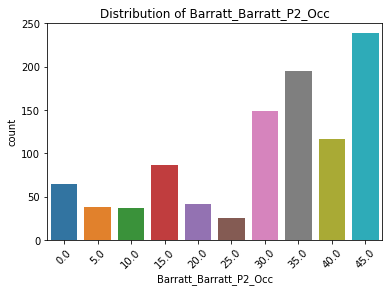

In [10]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

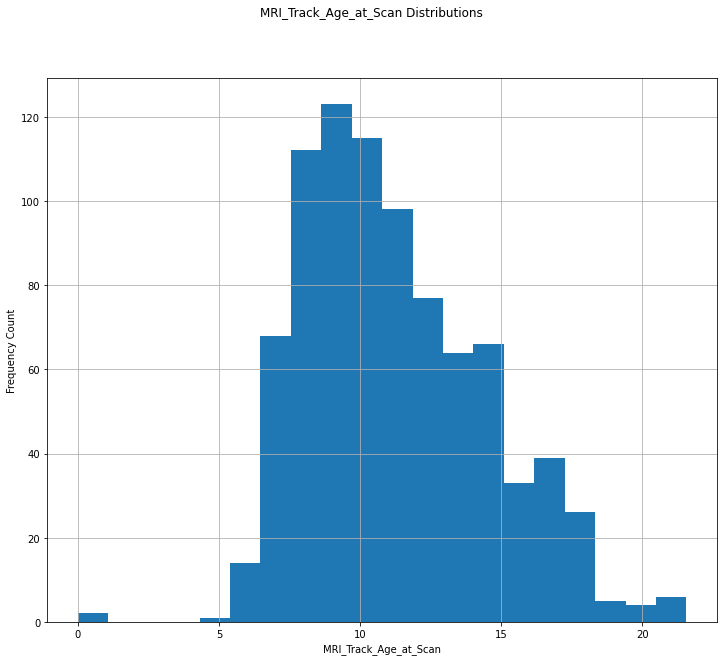

In [11]:
# Distribution of MRI_Track_Age_at_Scan
train_Quant['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()

In [12]:
# ADHD distribution
train_Solutions['ADHD_Outcome'].value_counts()

1    831
0    382
Name: ADHD_Outcome, dtype: int64

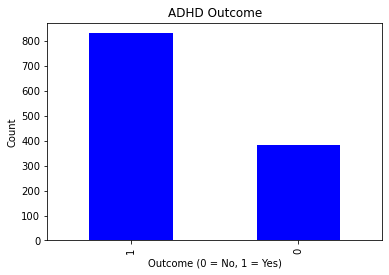

In [13]:
train_Solutions['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [14]:
train_Solutions['Sex_F'].value_counts()

0    797
1    416
Name: Sex_F, dtype: int64

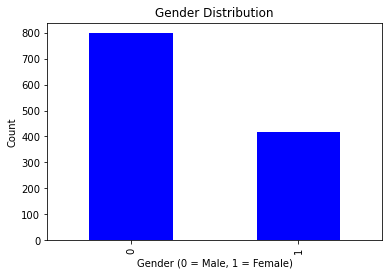

In [15]:
train_Solutions['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

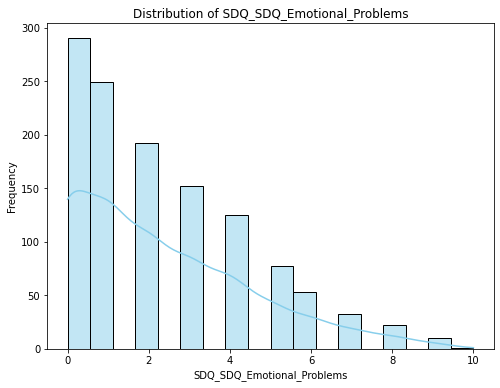

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(train_Quant['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

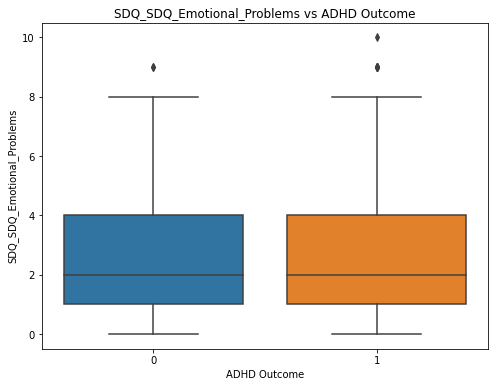

In [17]:
train_Quant_copy = train_Quant.copy()
train_Quant_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_Quant_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()

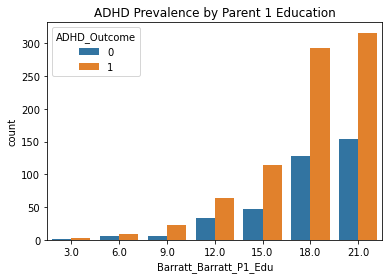

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_cat, x='Barratt_Barratt_P1_Edu', hue=train_Solutions['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 1 Education')
plt.show()

In [19]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: Barratt_Barratt_P1_Edu, dtype: int64

In [213]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P1_Edu
3.0     0.600000
6.0     0.600000
9.0     0.785714
12.0    0.659794
15.0    0.709877
18.0    0.695962
21.0    0.672340
Name: ADHD_Outcome, dtype: float64


In [214]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: Barratt_Barratt_P1_Edu, dtype: int64

In [215]:
for col in train_cat.select_dtypes(include='int').columns:
    train_cat[col] = train_cat[col].astype('category')

In [23]:
#columns_to_encode = train_cat.columns[1:].tolist()

# Print the columns to encode
#print("Columns to encode:", columns_to_encode)

In [24]:
# Combine encoded columns with the rest of the DataFrame
#cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
#cat_train_final.head()

In [25]:
#cat_train_final.info()

In [216]:
file_path_testC = "../TEST/TEST_CATEGORICAL.xlsx"
test_cat = pd.read_excel(file_path_testC)

In [27]:
# convert our int variables to categories
#for col in test_cat.select_dtypes(include='int').columns:
#    test_cat[col] = test_cat[col].astype('category')

# Encode categorical variables in test
#test_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)
#test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Ensure test_encoded has the same columns as train_encoded
#missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
#for col in missing_cols:
 #   test_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
#test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Combine encoded columns with the rest of the DataFrame
#cat_test_final = pd.concat([test_cat.drop(columns=columns_to_encode), test_encoded], axis=1)

#cat_test_final.head()

In [217]:
train_cat_FCM = pd.merge(train_cat, train_FCM, on = 'participant_id')

In [218]:
train_df = pd.merge(train_cat_FCM, train_Quant, on = 'participant_id')

# ensure it looks accurate
#train_df.head()

In [219]:
file_path_testFCM = "../TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
test_FCM = pd.read_csv(file_path_testFCM)
#print(train_FCM.head())

file_path_testQ = "../TEST/TEST_QUANTITATIVE_METADATA.xlsx"
test_Quant = pd.read_excel(file_path_testQ)
#print(train_Quant.head())

test_cat_FCM = pd.merge(test_cat, test_FCM, on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_Quant, on = 'participant_id')

# ensure it looks accurate
#test_df.head()

In [31]:
test_cat_FCM.shape, train_cat_FCM.shape, test_Quant.shape, train_Quant.shape, test_FCM.shape, train_FCM.shape

((304, 19910),
 (1213, 19910),
 (304, 19),
 (1213, 19),
 (304, 19901),
 (1213, 19901))

In [32]:
print(train_df.isna().sum())

participant_id                        0
Basic_Demos_Enroll_Year               0
Basic_Demos_Study_Site                0
PreInt_Demos_Fam_Child_Ethnicity     43
PreInt_Demos_Fam_Child_Race          54
                                   ... 
SDQ_SDQ_Hyperactivity                 9
SDQ_SDQ_Internalizing                 9
SDQ_SDQ_Peer_Problems                 9
SDQ_SDQ_Prosocial                     9
MRI_Track_Age_at_Scan               360
Length: 19928, dtype: int64


In [220]:
train_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)
train_df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

In [221]:
print(train_df.isna().sum().sum())

712


In [222]:
for col in train_df.columns:
    if train_df[col].isnull().any():
        train_df[col].fillna(train_df[col].mean(), inplace=True)
print(train_df.isna().sum().sum())

0


In [223]:
for col in test_df.columns:
    if test_df[col].isna().sum() > 0:  # Check if the column has NaN values
        if test_df[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            test_df[col] = test_df[col].fillna(test_df[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")

In [224]:
test_df.isna().sum().sum()

0

In [225]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale all columns except 'participant_id' and replace them in the original DataFrame
train_df[train_df.columns[1:]] = scaler.fit_transform(train_df[train_df.columns[1:]])

In [226]:
test_df.shape

(304, 19928)

In [227]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale all columns except 'participant_id' and replace them in the original DataFrame
test_df[test_df.columns[1:]] = scaler.fit_transform(test_df[test_df.columns[1:]])

In [228]:
file_path_trainS = "../TRAIN_NEW/TRAINING_SOLUTIONS.xlsx"
train_Solutions = pd.read_excel(file_path_trainS)

In [229]:
X_trainn = train_df.drop(columns = ['participant_id'])
Y_train = train_Solutions.drop(columns = ['participant_id'])

In [230]:
train_df.shape, train_Solutions.shape

((1213, 19928), (1213, 3))

In [231]:
import site
print(site.getsitepackages())

['c:\\ProgramData\\Anaconda3', 'c:\\ProgramData\\Anaconda3\\lib\\site-packages']


In [45]:

from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X_trainn, Y_train, test_size=0.3, random_state=42)

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)

# Wrap with MultiOutputClassifier
multi_output_knn = MultiOutputClassifier(knn)

# Train
multi_output_knn.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier())

In [48]:
y_pred = multi_output_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Y_train.columns))


Accuracy: 0.37362637362637363
              precision    recall  f1-score   support

ADHD_Outcome       0.70      0.80      0.75       256
       Sex_F       0.30      0.15      0.20       125

   micro avg       0.63      0.59      0.61       381
   macro avg       0.50      0.47      0.47       381
weighted avg       0.57      0.59      0.57       381
 samples avg       0.54      0.52      0.51       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
# Wrap with MultiOutputClassifier
knn = KNeighborsClassifier(n_neighbors=7)
multi_output_knn = MultiOutputClassifier(knn)

# Train
multi_output_knn.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=7))

In [52]:
y_pred = multi_output_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Y_train.columns))

Accuracy: 0.40934065934065933
              precision    recall  f1-score   support

ADHD_Outcome       0.72      0.88      0.79       256
       Sex_F       0.26      0.10      0.15       125

   micro avg       0.65      0.63      0.64       381
   macro avg       0.49      0.49      0.47       381
weighted avg       0.57      0.63      0.58       381
 samples avg       0.60      0.55      0.55       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression inside a pipeline
log_reg_pipeline = Pipeline([
    ('clf', MultiOutputClassifier(LogisticRegression(max_iter=1000, class_weight='balanced')))
])

# Train the model
log_reg_pipeline.fit(X_train, y_train)

# Predict
y_pred_logreg = log_reg_pipeline.predict(X_test)

# Evaluation
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, target_names=y_test.columns))


🔹 Logistic Regression
Accuracy: 0.3241758241758242
              precision    recall  f1-score   support

ADHD_Outcome       0.69      0.73      0.71       256
       Sex_F       0.32      0.30      0.31       125

   micro avg       0.58      0.59      0.58       381
   macro avg       0.51      0.52      0.51       381
weighted avg       0.57      0.59      0.58       381
 samples avg       0.51      0.51      0.49       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression inside a pipeline
log_reg_pipeline = Pipeline([
    ('clf', MultiOutputClassifier(LogisticRegression(max_iter=1000)))
])

# Train the model
log_reg_pipeline.fit(X_train, y_train)

# Predict
y_pred_logreg = log_reg_pipeline.predict(X_test)

# Evaluation
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, target_names=y_test.columns))


🔹 Logistic Regression
Accuracy: 0.34065934065934067
              precision    recall  f1-score   support

ADHD_Outcome       0.69      0.75      0.72       256
       Sex_F       0.31      0.25      0.28       125

   micro avg       0.59      0.58      0.59       381
   macro avg       0.50      0.50      0.50       381
weighted avg       0.57      0.58      0.57       381
 samples avg       0.52      0.51      0.49       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
y_test['Sex_F'].value_counts()

0    239
1    125
Name: Sex_F, dtype: int64

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest inside a pipeline (scaling is optional for RF but included for consistency)
rf_pipeline = Pipeline([
    ('clf', MultiOutputClassifier(RandomForestClassifier(class_weight='balanced')))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluation
print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=y_test.columns))


🔹 Random Forest
Accuracy: 0.4945054945054945
              precision    recall  f1-score   support

ADHD_Outcome       0.70      1.00      0.83       256
       Sex_F       0.00      0.00      0.00       125

   micro avg       0.70      0.67      0.69       381
   macro avg       0.35      0.50      0.41       381
weighted avg       0.47      0.67      0.55       381
 samples avg       0.70      0.60      0.63       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest inside a pipeline (scaling is optional for RF but included for consistency)
rf_pipeline = Pipeline([
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluation
print(" Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=y_test.columns))


 Random Forest
Accuracy: 0.46703296703296704
              precision    recall  f1-score   support

ADHD_Outcome       0.71      0.98      0.82       256
       Sex_F       0.10      0.01      0.01       125

   micro avg       0.69      0.66      0.67       381
   macro avg       0.40      0.49      0.42       381
weighted avg       0.51      0.66      0.56       381
 samples avg       0.68      0.59      0.62       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# Access the fitted pipeline steps properly
rf_model = pipeline.named_steps['clf'].estimators_[0]

# Get feature importances
importances = rf_model.feature_importances_

# View alongside feature names
features = X_train
for feat, imp in zip(features, importances):
    print(f"{feat}: {imp:.4f}")


[ 0.2690044   0.85805739 -0.63296474 ...  0.79854759 -1.3445871
 -0.4290424 ]: 0.0000
[ 1.16463083  0.85805739  0.840778   ... -0.64562466  0.11929133
  0.01076516]: 0.0000
[-0.62662202  0.85805739  0.840778   ... -0.16423391 -1.3445871
 -0.54404533]: 0.0000
[ 1.16463083 -0.88892276 -0.63296474 ...  1.27993834  1.09521028
  0.96584113]: 0.0000
[-0.62662202 -0.88892276 -0.63296474 ... -0.64562466  1.09521028
  0.01076516]: 0.0000
[ 0.2690044   0.85805739 -0.63296474 ... -0.16423391 -0.85662762
  0.01076516]: 0.0000
[ 0.2690044  -0.88892276 -0.63296474 ... -1.12701541  0.11929133
  0.01076516]: 0.0000
[ 0.2690044   0.85805739  0.840778   ... -0.16423391  0.60725081
  0.68317436]: 0.0000
[-1.52224845 -0.88892276  0.00943594 ... -0.16423391 -1.83254657
  0.26891648]: 0.0002
[-2.41787488 -0.88892276 -0.63296474 ...  0.31715684  1.09521028
 -0.95921342]: 0.0001
[ 0.2690044  -0.88892276 -0.63296474 ... -1.12701541  1.09521028
  2.21705393]: 0.0000
[-0.62662202  0.85805739  0.840778   ... -0.6

In [59]:
from sklearn.tree import DecisionTreeClassifier
model = MultiOutputClassifier(DecisionTreeClassifier(criterion='entropy', class_weight='balanced'))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
from sklearn.tree import plot_tree
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X_test.columns);

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔢 Multi-output Accuracy: {accuracy:.4f}")
# Evaluate
print("Classification Report for Gender and ADHD:")
print(classification_report(y_test, y_pred, target_names=['female/no_ADHD', 'male/ADHD']))


🔢 Multi-output Accuracy: 0.3022
Classification Report for Gender and ADHD:
                precision    recall  f1-score   support

female/no_ADHD       0.69      0.65      0.67       256
     male/ADHD       0.33      0.33      0.33       125

     micro avg       0.57      0.55      0.56       381
     macro avg       0.51      0.49      0.50       381
  weighted avg       0.57      0.55      0.56       381
   samples avg       0.46      0.47      0.44       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.tree import DecisionTreeClassifier
model = MultiOutputClassifier(DecisionTreeClassifier(max_depth=5, class_weight='balanced'))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔢 Multi-output Accuracy: {accuracy:.4f}")
# Evaluate
print("Classification Report for Gender and ADHD:")
print(classification_report(y_test, y_pred, target_names=['female/no_ADHD', 'male/ADHD']))


🔢 Multi-output Accuracy: 0.3159
Classification Report for Gender and ADHD:
                precision    recall  f1-score   support

female/no_ADHD       0.69      0.63      0.66       256
     male/ADHD       0.27      0.23      0.25       125

     micro avg       0.56      0.50      0.53       381
     macro avg       0.48      0.43      0.45       381
  weighted avg       0.55      0.50      0.52       381
   samples avg       0.44      0.43      0.42       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Assuming you already have X_train, X_test, y_train, y_test

# 1. Build the pipeline
pipeline = Pipeline([
    ('clf', MultiOutputClassifier(DecisionTreeClassifier()))
])

# 2. Define hyperparameters to tune
param_grid = {
    'clf__estimator__criterion': ['gini', 'entropy'],
    'clf__estimator__max_depth': [5, 10, 15, None],
    'clf__estimator__max_leaf_nodes': [None,5, 10, 20, 30]
}

# 3. Grid Search with Cross Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', verbose=2, n_jobs=-1)

# 4. Fit the model
grid_search.fit(X_train, y_train)

# 5. Best Parameters
print("Best Parameters:\n", grid_search.best_params_)

# 6. Predict on test set
y_pred = grid_search.predict(X_test)

# 7. Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=y_test.columns))


Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


Best Parameters:
 {'clf__estimator__criterion': 'gini', 'clf__estimator__max_depth': 5, 'clf__estimator__max_leaf_nodes': None}

Classification Report:

              precision    recall  f1-score   support

ADHD_Outcome       0.68      0.76      0.72       256
       Sex_F       0.35      0.26      0.30       125

   micro avg       0.60      0.60      0.60       381
   macro avg       0.52      0.51      0.51       381
weighted avg       0.57      0.60      0.58       381
 samples avg       0.52      0.52      0.50       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
def multi_output_accuracy(y_true, y_pred):
    # Ensure y_true and y_pred are NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # Compute accuracy for each target variable and return the mean
    return np.mean([accuracy_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

In [66]:
from sklearn.metrics import f1_score, make_scorer
import numpy as np

def multi_output_f1_score(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    scores = []
    
    for i in range(y_true.shape[1]):
        f1 = f1_score(y_true[:, i], y_pred[:, i], average='binary', zero_division=0)
        scores.append(f1)
        
    return np.mean(scores)

multi_output_scorer = make_scorer(multi_output_f1_score)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(train_df.drop(columns='participant_id'), train_Solutions['Sex_F'])


LogisticRegression(max_iter=1000)

In [68]:
# Get coefficients for Sex prediction
coefficients = pd.Series(model.coef_[0], index=train_df.drop(columns='participant_id').columns)


In [69]:
# Select top features for Sex prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

45throw_52thcolumn      0.088502
33throw_55thcolumn      0.080254
14throw_127thcolumn     0.071127
119throw_157thcolumn    0.069788
51throw_53thcolumn      0.066870
72throw_92thcolumn      0.066449
162throw_186thcolumn    0.066427
97throw_143thcolumn     0.064831
50throw_53thcolumn      0.064500
162throw_182thcolumn    0.064355
dtype: float64


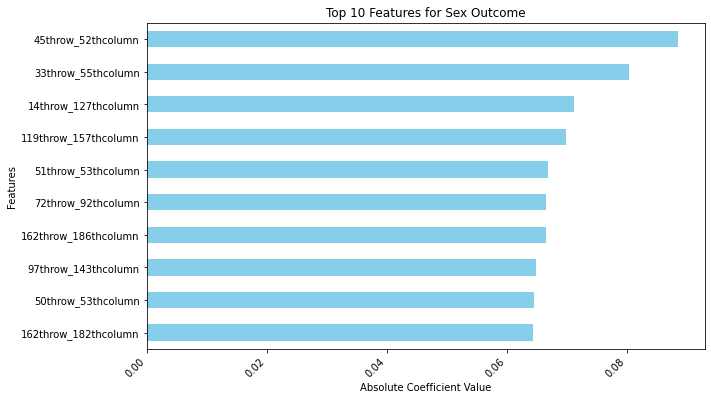

In [70]:
#Plotting the top 10 coefficents for Sex Outcome
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for Sex Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [71]:
model = LogisticRegression(max_iter=1000)
model.fit(train_df.drop(columns='participant_id'), train_Solutions['ADHD_Outcome'])

LogisticRegression(max_iter=1000)

In [72]:
# Get coefficients for ADHD_Outcome prediction
coefficients = pd.Series(model.coef_[0], index=train_df.drop(columns='participant_id').columns)

In [73]:
# Select top features for ADHD_Outcome prediction
top_features = coefficients.abs().nlargest(10)
print(top_features)

50throw_83thcolumn      0.077596
64throw_161thcolumn     0.072672
3throw_172thcolumn      0.070448
52throw_64thcolumn      0.070320
156throw_168thcolumn    0.069130
49throw_72thcolumn      0.068749
157throw_172thcolumn    0.068151
3throw_67thcolumn       0.067378
12throw_65thcolumn      0.066785
44throw_142thcolumn     0.066324
dtype: float64


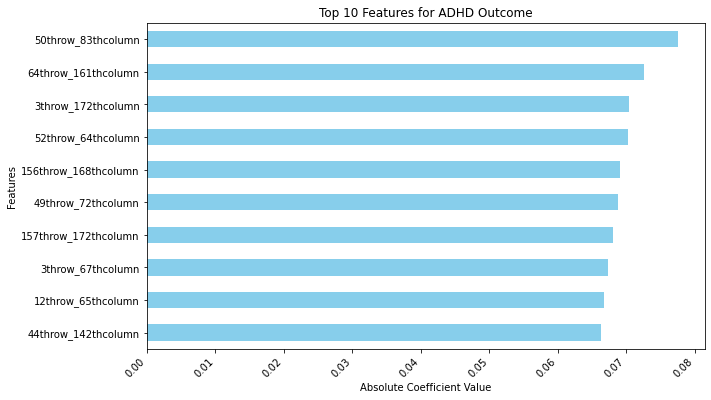

In [74]:
#Plotting the top 10 coefficents
plt.figure(figsize=(10,6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Features for ADHD Outcome')
plt.ylabel('Features')
plt.xlabel('Absolute Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [75]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(train_df.drop(columns='participant_id'), train_Solutions['Sex_F'])

LogisticRegression(penalty='l1', solver='liblinear')

In [76]:
selected_features_Sex = train_df.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_Sex)

Index(['Basic_Demos_Study_Site', '0throw_1thcolumn', '0throw_12thcolumn',
       '0throw_43thcolumn', '0throw_89thcolumn', '0throw_112thcolumn',
       '0throw_180thcolumn', '0throw_193thcolumn', '1throw_39thcolumn',
       '1throw_46thcolumn',
       ...
       '175throw_177thcolumn', '175throw_178thcolumn', '179throw_183thcolumn',
       '180throw_199thcolumn', '181throw_197thcolumn', '186throw_188thcolumn',
       '195throw_198thcolumn', '197throw_198thcolumn', 'APQ_P_APQ_P_INV',
       'SDQ_SDQ_Hyperactivity'],
      dtype='object', length=883)


In [77]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(train_df.drop(columns='participant_id'), train_Solutions['ADHD_Outcome'])

LogisticRegression(penalty='l1', solver='liblinear')

In [78]:
selected_features_ADHD = train_df.drop(columns='participant_id').columns[model.coef_[0] != 0]
print(selected_features_ADHD)

Index(['0throw_41thcolumn', '0throw_92thcolumn', '0throw_153thcolumn',
       '0throw_165thcolumn', '0throw_166thcolumn', '1throw_28thcolumn',
       '1throw_37thcolumn', '1throw_50thcolumn', '1throw_69thcolumn',
       '1throw_103thcolumn',
       ...
       '176throw_192thcolumn', '177throw_195thcolumn', '179throw_183thcolumn',
       '181throw_182thcolumn', '181throw_194thcolumn', '185throw_194thcolumn',
       '187throw_195thcolumn', '188throw_191thcolumn', 'EHQ_EHQ_Total',
       'MRI_Track_Age_at_Scan'],
      dtype='object', length=861)


In [79]:
# Step 1: Find common features between ADHD and Sex selected features
common_features = list(set(selected_features_ADHD) & set(selected_features_Sex))

In [80]:
X_train = pd.DataFrame(X_train, columns=train_df.drop(columns='participant_id').columns)
X_test = pd.DataFrame(X_test, columns=train_df.drop(columns='participant_id').columns)

In [81]:
X_train_2 = X_train[common_features]
X_test_2 = X_test[common_features]

In [82]:
grid_search.fit(X_train_2, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf',
                                        MultiOutputClassifier(estimator=DecisionTreeClassifier()))]),
             n_jobs=-1,
             param_grid={'clf__estimator__criterion': ['gini', 'entropy'],
                         'clf__estimator__max_depth': [5, 10, 15, None],
                         'clf__estimator__max_leaf_nodes': [None, 5, 10, 20,
                                                            30]},
             scoring='recall', verbose=2)

In [83]:
y_pred_2 = grid_search.predict(X_test_2)

In [84]:
# Convert predictions to a DataFrame
predictions_df_2 = pd.DataFrame(
    y_pred_2,
    columns=['Predicted_Gender', 'Predicted_ADHD']
)

# Combine participant IDs with predictions
result_df_2 = pd.concat([train_Quant['participant_id'].reset_index(drop=True), predictions_df_2], axis=1)

result_df_2.head()

participant_id  Predicted_Gender  Predicted_ADHD
0   00aIpNTbG5uh               1.0             1.0
1   00fV0OyyoLfw               1.0             0.0
2   04X1eiS79T4B               1.0             0.0
3   05ocQutkURd6               1.0             0.0
4   06YUNBA9ZRLq               1.0             0.0

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

In [86]:
multi_output_scorer = make_scorer(multi_output_accuracy)

In [87]:
# Perform cross-validation on the training data
cv_scores_2 = cross_val_score(grid_search, X_train_2, y_train, cv=7, scoring=multi_output_scorer)

# Output the cross-validation results
print("Cross-validation scores for each fold:", cv_scores_2)
print("Mean CV score:", np.mean(cv_scores_2))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Cross-validation scores for each fold: [0.62704918 0.66803279 0.64876033 0.62809917 0.60743802 0.56198347
 0.59917355]
Mean CV score: 0.6200766446668086


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


In [88]:
knn = KNeighborsClassifier(n_neighbors=5)

# Wrap with MultiOutputClassifier
multi_output_knn = MultiOutputClassifier(knn)

# Train
multi_output_knn.fit(X_train_2, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier())

In [89]:
y_pred = multi_output_knn.predict(X_test_2)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Y_train.columns))

Accuracy: 0.43956043956043955
              precision    recall  f1-score   support

ADHD_Outcome       0.73      0.88      0.79       256
       Sex_F       0.48      0.37      0.42       125

   micro avg       0.67      0.71      0.69       381
   macro avg       0.61      0.62      0.61       381
weighted avg       0.65      0.71      0.67       381
 samples avg       0.62      0.62      0.60       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
from sklearn.tree import DecisionTreeClassifier
model = MultiOutputClassifier(DecisionTreeClassifier(criterion='entropy', class_weight='balanced'))

model.fit(X_train_2, y_train)
y_pred = model.predict(X_test_2)

In [91]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Y_train.columns))

Accuracy: 0.31868131868131866
              precision    recall  f1-score   support

ADHD_Outcome       0.72      0.69      0.71       256
       Sex_F       0.29      0.30      0.30       125

   micro avg       0.57      0.56      0.57       381
   macro avg       0.51      0.50      0.50       381
weighted avg       0.58      0.56      0.57       381
 samples avg       0.47      0.49      0.46       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
from sklearn.tree import DecisionTreeClassifier
model = MultiOutputClassifier(DecisionTreeClassifier(max_depth=5))

model.fit(X_train_2, y_train)
y_pred = model.predict(X_test_2)

In [93]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Y_train.columns))

Accuracy: 0.4065934065934066
              precision    recall  f1-score   support

ADHD_Outcome       0.73      0.82      0.77       256
       Sex_F       0.34      0.29      0.31       125

   micro avg       0.63      0.65      0.64       381
   macro avg       0.54      0.55      0.54       381
weighted avg       0.60      0.65      0.62       381
 samples avg       0.55      0.56      0.54       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest inside a pipeline (scaling is optional for RF but included for consistency)
rf_pipeline = Pipeline([
    ('clf', MultiOutputClassifier(RandomForestClassifier(max_depth=6, class_weight='balanced', n_estimators=70, random_state=38)))
])

# Train the model
rf_pipeline.fit(X_train_2, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test_2)

# Evaluation
print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=y_test.columns))

🔹 Random Forest
Accuracy: 0.4835164835164835
              precision    recall  f1-score   support

ADHD_Outcome       0.72      0.90      0.80       256
       Sex_F       0.52      0.22      0.31       125

   micro avg       0.69      0.68      0.69       381
   macro avg       0.62      0.56      0.56       381
weighted avg       0.66      0.68      0.64       381
 samples avg       0.65      0.60      0.61       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the base KNN model
knn = KNeighborsClassifier()

# Step 2: Wrap it with MultiOutputClassifier
multi_knn = MultiOutputClassifier(knn)

# Step 3: Define the parameter grid for tuning
param_grid = {
    'estimator__n_neighbors': [3, 5, 7, 9],
    'estimator__weights': ['uniform', 'distance', 'custom'],
    'estimator__metric': ['euclidean', 'manhattan'],
}

# Step 4: GridSearch with your multi-output model
grid_search = GridSearchCV(multi_knn, param_grid, cv=7, scoring=multi_output_f1_score, verbose=2, n_jobs=-1)

# Step 5: Fit the grid search on your training data
grid_search.fit(X_train_2, y_train)
y_pred_knn = grid_search.predict(X_test_2)
# Step 6: Evaluate the model
print("🔹 KNN with Grid Search")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=y_test.columns))


Fitting 7 folds for each of 24 candidates, totalling 168 fits
🔹 KNN with Grid Search
Accuracy: 0.41208791208791207
              precision    recall  f1-score   support

ADHD_Outcome       0.74      0.80      0.77       256
       Sex_F       0.45      0.40      0.43       125

   micro avg       0.66      0.67      0.66       381
   macro avg       0.60      0.60      0.60       381
weighted avg       0.64      0.67      0.66       381
 samples avg       0.57      0.58      0.55       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
X_test.shape, y_test.shape


((364, 19927), (364, 2))

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import classification_report

# Initialize base classifier
base_lr = LogisticRegression(max_iter=1000)
# Create a ClassifierChain model


# Create ClassifierChain model
chain_model = ClassifierChain(base_lr, order='random', random_state=50)

# Fit the model
chain_model.fit(X_train_2, y_train)

# Predict
y_pred = chain_model.predict(X_test_2)
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Multi-output Accuracy: {accuracy:.4f}")
# Evaluate
print("Classification Report for Gender and ADHD:")
print(classification_report(y_test, y_pred, target_names=['female/no_ADHD', 'male/ADHD']))



 Multi-output Accuracy: 0.4918
Classification Report for Gender and ADHD:
                precision    recall  f1-score   support

female/no_ADHD       0.74      0.86      0.80       256
     male/ADHD       0.59      0.37      0.45       125

     micro avg       0.71      0.70      0.70       381
     macro avg       0.67      0.61      0.63       381
  weighted avg       0.69      0.70      0.68       381
   samples avg       0.67      0.62      0.63       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.base import clone

# Base classifier
rf = RandomForestClassifier(random_state=30)

# Wrap in classifier chain (no need for MultiOutputClassifier)
chain = ClassifierChain(base_estimator=rf, order='random', random_state=30)

# Grid search parameters
param_grid = {
    'base_estimator__n_estimators': [50,60,70,80,90,100],
    'base_estimator__max_depth': [5,6,7,8,9,10],
    'base_estimator__min_samples_split': [2,3,4, 5]
}

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=chain,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)

# Predict
y_pred = grid_search.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Accuracy: 0.47527472527472525
F1 Score: 0.41666666666666663


In [99]:
print(classification_report(y_test, y_pred, target_names=['female/no_ADHD', 'male/ADHD']))

                precision    recall  f1-score   support

female/no_ADHD       0.70      0.98      0.82       256
     male/ADHD       0.14      0.01      0.02       125

     micro avg       0.69      0.66      0.68       381
     macro avg       0.42      0.50      0.42       381
  weighted avg       0.52      0.66      0.55       381
   samples avg       0.69      0.59      0.62       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.base import clone

# Base classifier
rf = RandomForestClassifier(random_state=30)

# Wrap in classifier chain (no need for MultiOutputClassifier)
chain = ClassifierChain(base_estimator=rf, order='random', random_state=30)

# Grid search parameters
param_grid = {
    'base_estimator__n_estimators': [50,60,70,80,90,100],
    'base_estimator__max_depth': [5,6,7,8,9,10],
    'base_estimator__min_samples_split': [2,3,4, 5]
}

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=chain,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1,
)

# Fit
grid_search.fit(X_train_2, y_train)

# Predict
y_pred = grid_search.predict(X_test_2)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for Gender and ADHD:")
print(classification_report(y_test, y_pred, target_names=['female/no_ADHD', 'male/ADHD']))



Fitting 5 folds for each of 144 candidates, totalling 720 fits
Accuracy: 0.49725274725274726
Classification Report for Gender and ADHD:
                precision    recall  f1-score   support

female/no_ADHD       0.71      1.00      0.83       256
     male/ADHD       0.50      0.06      0.10       125

     micro avg       0.70      0.69      0.69       381
     macro avg       0.61      0.53      0.46       381
  weighted avg       0.64      0.69      0.59       381
   samples avg       0.70      0.61      0.64       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
train_Solutions.info

<bound method DataFrame.info of      participant_id  ADHD_Outcome  Sex_F
0      UmrK0vMLopoR             1      1
1      CPaeQkhcjg7d             1      0
2      Nb4EetVPm3gs             1      0
3      p4vPhVu91o4b             1      1
4      M09PXs7arQ5E             1      1
...             ...           ...    ...
1208   Atx7oub96GXS             0      0
1209   groSbUfkQngM             0      1
1210   zmxGvIrOD0bt             0      1
1211   rOmWFuJCud5G             0      0
1212   k8HhHnnu2wmt             0      0

[1213 rows x 3 columns]>

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

# Step 1: Create the base model (Decision Tree)
base_dt = DecisionTreeClassifier(random_state=35)

chain = ClassifierChain(base_estimator=base_dt, order='random', random_state=35)

# Grid search parameters
param_grid = {
    'base_estimator__n_estimators': [50,60,70,80,90,100],
    'base_estimator__max_depth': [5,6,7,8,9,10,11],
    'base_estimator__min_samples_split': [2,3,4,5,6,7,8,9,10]
}

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=chain,
    param_grid=param_grid,
    scoring=multi_output_accuracy,
    cv=7,
    n_jobs=-1,
    verbose=1,
)

# Step 4: Cross-validation
cv_scores = cross_val_score(chain, X_train_2, y_train, cv=7, scoring=multi_output_accuracy, n_jobs=-1)
# Step 5: Fit the model on the entire training set
chain.fit(X_train_2, y_train)
# Step 6: Predict on the test set
y_pred = chain.predict(X_test_2)

# Step 5: Output results
print("Cross-validation F1-macro scores:", cv_scores)
print("Mean F1-macro score:", cv_scores.mean())
print("Classification Report", classification_report(y_test, y_pred, target_names=y_train.columns))

Cross-validation F1-macro scores: [nan nan nan nan nan nan nan]
Mean F1-macro score: nan
Classification Report               precision    recall  f1-score   support

ADHD_Outcome       0.72      0.64      0.68       256
       Sex_F       0.33      0.34      0.34       125

   micro avg       0.58      0.55      0.56       381
   macro avg       0.53      0.49      0.51       381
weighted avg       0.59      0.55      0.57       381
 samples avg       0.46      0.47      0.45       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.30494505494505497


In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Step 1: Base model - KNN
knn_model = KNeighborsClassifier(n_neighbors=7)

# Step 2: Wrap in ClassifierChain
knn_chain = ClassifierChain(knn_model)

# Step 3: F1 Macro scorer
f1_macro = make_scorer(f1_score, average='macro')

# Step 4: Cross-validation
cv_scores_knn = cross_val_score(knn_chain, X_train_2, y_train, cv=7, scoring=f1_macro)
knn_chain.fit(X_train_2, y_train)
# Step 6: Predict on the test set
y_pred = knn_chain.predict(X_test_2)

# Step 5: Output results
print("Cross-validation F1-macro scores (KNN):", cv_scores_knn)
print("Mean F1-macro score:", cv_scores_knn.mean())
print("Classification Report", classification_report(y_test, y_pred, target_names=y_train.columns))
print("Accuracy:", accuracy_score(y_test, y_pred))

Cross-validation F1-macro scores (KNN): [0.54759673 0.47266266 0.49531194 0.56842397 0.57002924 0.51631206
 0.52555283]
Mean F1-macro score: 0.5279842020892904
Classification Report               precision    recall  f1-score   support

ADHD_Outcome       0.73      0.89      0.80       256
       Sex_F       0.41      0.27      0.33       125

   micro avg       0.66      0.69      0.68       381
   macro avg       0.57      0.58      0.57       381
weighted avg       0.63      0.69      0.65       381
 samples avg       0.62      0.60      0.59       381

Accuracy: 0.4175824175824176


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain

# Step 1: Define PCA, base model, and chain
pca = PCA(n_components=0.95)
base_knn = KNeighborsClassifier()
classifier_chain = ClassifierChain(base_knn)

# Step 2: Pipeline
pipeline = Pipeline([
    ('pca', pca),
    ('classifier_chain', classifier_chain)
])

# Step 3: Scoring metric
f1_macro = make_scorer(f1_score, average='macro')

# Step 4: Parameter grid — specify for base estimator inside classifier_chain
param_grid = {
    'classifier_chain__base_estimator__n_neighbors': [3, 5, 7,9],
    'classifier_chain__base_estimator__weights': ['uniform', 'distance'],
    'classifier_chain__base_estimator__metric': ['euclidean', 'manhattan']
}

# Step 5: GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring=multi_output_accuracy, cv=5, n_jobs=-1)

# Step 6: Fit the model
grid_search.fit(X_train_2, y_train)

y_pred = grid_search.predict(X_test_2)
# Step 6: Evaluate the model
print("🔹 KNN with PCA and Classifier Chain")

# Step 7: Output best results
print("Best parameters:", grid_search.best_params_)
print("Best F1-macro score:", grid_search.best_score_)
print("Classification Report", classification_report(y_test, y_pred, target_names=y_train.columns))
print("Accuracy:", accuracy_score(y_test, y_pred))


🔹 KNN with PCA and Classifier Chain
Best parameters: {'classifier_chain__base_estimator__metric': 'euclidean', 'classifier_chain__base_estimator__n_neighbors': 3, 'classifier_chain__base_estimator__weights': 'uniform'}
Best F1-macro score: nan
Classification Report               precision    recall  f1-score   support

ADHD_Outcome       0.71      0.79      0.75       256
       Sex_F       0.47      0.35      0.40       125

   micro avg       0.65      0.65      0.65       381
   macro avg       0.59      0.57      0.58       381
weighted avg       0.63      0.65      0.64       381
 samples avg       0.57      0.56      0.55       381

Accuracy: 0.41208791208791207


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Step 1: Define the base logistic regression model
base_logreg = LogisticRegression(solver='liblinear', max_iter=1000)

# Step 2: Create a ClassifierChain with the base model
classifier_chain = ClassifierChain(base_logreg)

# Step 3: Set up a pipeline with PCA and ClassifierChain
pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),  # Keep 95% variance
    ('classifier_chain', classifier_chain)
])

# Step 4: Define the scoring metric (F1 Macro)
f1_macro = make_scorer(f1_score, average='macro')

# Step 5: Define hyperparameters to tune for Logistic Regression
param_grid = {
    'classifier_chain__base_estimator__C': [0.01, 0.1, 1, 10],
    'classifier_chain__base_estimator__penalty': ['l1', 'l2'],
    'classifier_chain__base_estimator__solver': ['liblinear']
}

# Step 6: Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring=f1_macro, cv=5)

# Step 7: Fit the model
grid_search.fit(X_train_2, y_train)

y_pred = grid_search.predict(X_test_2)

# Step 8: Output the results
print("Best parameters found:", grid_search.best_params_)
print("Best F1-macro score:", grid_search.best_score_)
print("Classification Report", classification_report(y_test, y_pred, target_names=y_train.columns))
print("Accuracy:", accuracy_score(y_test, y_pred))


Best parameters found: {'classifier_chain__base_estimator__C': 10, 'classifier_chain__base_estimator__penalty': 'l1', 'classifier_chain__base_estimator__solver': 'liblinear'}
Best F1-macro score: 0.538057590869049
Classification Report               precision    recall  f1-score   support

ADHD_Outcome       0.74      0.86      0.79       256
       Sex_F       0.54      0.28      0.37       125

   micro avg       0.70      0.67      0.68       381
   macro avg       0.64      0.57      0.58       381
weighted avg       0.67      0.67      0.65       381
 samples avg       0.66      0.60      0.62       381

Accuracy: 0.48626373626373626


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Step 1: Define the base logistic regression model
base_logreg = LogisticRegression(max_iter=2000, class_weight='balanced')

# Step 2: Create a ClassifierChain with the base model
classifier_chain = ClassifierChain(base_logreg)

# Step 3: Set up a pipeline with PCA and ClassifierChain
pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),  # Keep 95% variance
    ('classifier_chain', classifier_chain)
])

# Step 4: Define the scoring metric (F1 Macro)
f1_macro = make_scorer(f1_score, average='macro')

# Step 5: Define hyperparameters to tune for Logistic Regression
param_grid = {
    'classifier_chain__base_estimator__C': [0.01, 0.1, 1, 10,100],
    'classifier_chain__base_estimator__penalty': ['l1', 'l2'],
    'classifier_chain__base_estimator__solver': ['liblinear']
}

# Step 6: Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring=f1_macro, cv=7, n_jobs=-1, verbose=1)

# Step 7: Fit the model
grid_search.fit(X_train_2, y_train)

y_pred = grid_search.predict(X_test_2)

# Step 8: Output the results
print("Best parameters found:", grid_search.best_params_)
print("Best F1-macro score:", grid_search.best_score_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report", classification_report(y_test, y_pred, target_names=y_train.columns))



Fitting 7 folds for each of 10 candidates, totalling 70 fits
Best parameters found: {'classifier_chain__base_estimator__C': 1, 'classifier_chain__base_estimator__penalty': 'l1', 'classifier_chain__base_estimator__solver': 'liblinear'}
Best F1-macro score: 0.5929023361847562
Accuracy: 0.39285714285714285
Classification Report               precision    recall  f1-score   support

ADHD_Outcome       0.78      0.61      0.68       256
       Sex_F       0.50      0.66      0.57       125

   micro avg       0.65      0.62      0.64       381
   macro avg       0.64      0.63      0.62       381
weighted avg       0.68      0.62      0.64       381
 samples avg       0.57      0.53      0.53       381



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
from sklearn.model_selection import train_test_split

# Combine gender and ADHD into a single stratification label
# This assumes values like: (0,0), (0,1), (1,0), (1,1)
stratify_labels = train_Solutions['Sex_F'].astype(str) + "_" + train_Solutions['ADHD_Outcome'].astype(str)

# Split the data while preserving the distribution of these combined labels
X_train, X_test, y_train, y_test = train_test_split(
    train_df.drop(columns = ['participant_id']),Y_train,
    test_size=0.3,
    random_state=42,
    stratify=stratify_labels
)
# Check the distribution in the training and test sets
print("Training set distribution:\n", y_train.value_counts(normalize=True))
print("Test set distribution:\n", y_test.value_counts(normalize=True))


Training set distribution:
 ADHD_Outcome  Sex_F
1             0        0.479388
              1        0.206125
0             0        0.177856
              1        0.136631
dtype: float64
Test set distribution:
 ADHD_Outcome  Sex_F
1             0        0.478022
              1        0.206044
0             0        0.178571
              1        0.137363
dtype: float64


In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#create a knn model with pca and classifier chain and standard scaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Keep 95% variance
    ('classifier_chain', ClassifierChain(KNeighborsClassifier(n_neighbors=5)))
])
# Define the parameter grid for tuning
param_grid = {
    'classifier_chain__base_estimator__n_neighbors': [3, 5, 7, 9],
    'classifier_chain__base_estimator__weights': ['uniform', 'distance'],
    'classifier_chain__base_estimator__metric': ['euclidean', 'manhattan']
}
# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=Pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
# Fit the model
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
# Evaluate
print("🔹 KNN with PCA and Classifier Chain"
      )
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=y_train.columns))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
🔹 KNN with PCA and Classifier Chain
Accuracy: 0.3241758241758242
              precision    recall  f1-score   support

ADHD_Outcome       0.67      0.55      0.61       249
       Sex_F       0.30      0.10      0.15       125

   micro avg       0.61      0.40      0.48       374
   macro avg       0.48      0.33      0.38       374
weighted avg       0.55      0.40      0.45       374
 samples avg       0.39      0.34      0.35       374



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import accuracy_score, f1_score

# Logistic Regression base
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
chain_logreg = ClassifierChain(logreg)
chain_logreg.fit(X_train, y_train)

# Prediction
y_pred_logreg = chain_logreg.predict(X_test)

# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("F1 Score (macro):", f1_score(y_test, y_pred_logreg, average='macro'))


Logistic Regression
Accuracy: 0.17307692307692307
F1 Score (macro): 0.39201346389228886


In [111]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree base
dtree = DecisionTreeClassifier(random_state=42)
chain_dtree = ClassifierChain(dtree)
chain_dtree.fit(X_train, y_train)

# Prediction
y_pred_dtree = chain_dtree.predict(X_test)

# Evaluation
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("F1 Score (macro):", f1_score(y_test, y_pred_dtree, average='macro'))


Decision Tree
Accuracy: 0.3324175824175824
F1 Score (macro): 0.4853589637591291


In [112]:
print("Classification Report", classification_report(y_test, y_pred_dtree, target_names=y_train.columns))
print("Classification Report", classification_report(y_test, y_pred_logreg, target_names=y_train.columns))

Classification Report               precision    recall  f1-score   support

ADHD_Outcome       0.70      0.68      0.69       249
       Sex_F       0.30      0.26      0.28       125

   micro avg       0.57      0.54      0.56       374
   macro avg       0.50      0.47      0.49       374
weighted avg       0.57      0.54      0.55       374
 samples avg       0.46      0.47      0.45       374

Classification Report               precision    recall  f1-score   support

ADHD_Outcome       0.60      0.23      0.33       249
       Sex_F       0.34      0.69      0.45       125

   micro avg       0.41      0.38      0.40       374
   macro avg       0.47      0.46      0.39       374
weighted avg       0.51      0.38      0.37       374
 samples avg       0.32      0.30      0.29       374



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest base
rf = RandomForestClassifier(n_estimators=100, random_state=42)
chain_rf = ClassifierChain(rf)
chain_rf.fit(X_train, y_train)

# Prediction
y_pred_rf = chain_rf.predict(X_test)

# Evaluation
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score (macro):", f1_score(y_test, y_pred_rf, average='macro'))


Random Forest
Accuracy: 0.45879120879120877
F1 Score (macro): 0.4359712230215827


In [114]:
print("classification report", classification_report(y_test, y_pred_rf, target_names=y_train.columns))

classification report               precision    recall  f1-score   support

ADHD_Outcome       0.68      0.97      0.80       249
       Sex_F       0.36      0.04      0.07       125

   micro avg       0.67      0.66      0.66       374
   macro avg       0.52      0.51      0.44       374
weighted avg       0.57      0.66      0.56       374
 samples avg       0.66      0.57      0.60       374



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
train_df['Barratt_Barratt_P1_Edu'].value_counts()

 9.010223e-01    470
 3.955006e-02    421
-8.219221e-01    162
-1.683394e+00     97
-2.544867e+00     28
 1.020188e-15     15
-3.406339e+00     15
-4.267811e+00      5
Name: Barratt_Barratt_P1_Edu, dtype: int64

In [116]:
edu_mapping = {3:0, 6:1, 9:2, 12:3, 15:4, 18:5, 21:6}
train_df['Barratt_P1_Edu_encoded'] = train_cat['Barratt_Barratt_P1_Edu'].map(edu_mapping)
train_df['Barratt_P1_Edu_encoded'].value_counts()


6.0    470
5.0    421
4.0    162
3.0     97
2.0     28
1.0     15
0.0      5
Name: Barratt_P1_Edu_encoded, dtype: int64

In [117]:
train_df['APQ_Composite'] = train_df['APQ_P_APQ_P_PP'] - train_df['APQ_P_APQ_P_CP']
train_df['APQ_Composite'].value_counts()


 1.442701    114
 1.113463     86
 0.454986     77
 0.125747     76
 0.784224     75
            ... 
-5.628401      1
 1.539968      1
-2.336017      1
-6.346706      1
-4.079475      1
Name: APQ_Composite, Length: 91, dtype: int64

In [118]:
train_df['SDQ_Ext_x_APQ_CP'] = train_df['SDQ_SDQ_Externalizing'] * train_df['APQ_P_APQ_P_CP']
train_df['SDQ_Ext_x_APQ_PP'] = train_df['SDQ_SDQ_Externalizing'] * train_df['APQ_P_APQ_P_PP']
train_df['SDQ_Int_x_APQ_CP'] = train_df['SDQ_SDQ_Internalizing'] * train_df['APQ_P_APQ_P_CP']
train_df['SDQ_Int_x_APQ_PP'] = train_df['SDQ_SDQ_Internalizing'] * train_df['APQ_P_APQ_P_PP']




In [119]:
test_df['SDQ_Ext_x_APQ_CP'] = test_df['SDQ_SDQ_Externalizing'] * test_df['APQ_P_APQ_P_CP']
test_df['SDQ_Ext_x_APQ_PP'] = test_df['SDQ_SDQ_Externalizing'] * test_df['APQ_P_APQ_P_PP']
test_df['SDQ_Int_x_APQ_CP'] = test_df['SDQ_SDQ_Internalizing'] * test_df['APQ_P_APQ_P_CP']
test_df['SDQ_Int_x_APQ_PP'] = test_df['SDQ_SDQ_Internalizing'] * test_df['APQ_P_APQ_P_PP']

In [120]:
test_df['Barratt_Barratt_P1_Edu'].value_counts()
edu_mapping = {3:0, 6:1, 9:2, 12:3, 15:4, 18:5, 21:6}
test_df['Barratt_P1_Edu_encoded'] = test_cat['Barratt_Barratt_P1_Edu'].map(edu_mapping)
test_df['Barratt_P1_Edu_encoded'].value_counts()


6.0    170
5.0     95
4.0     27
3.0      7
2.0      2
1.0      1
0.0      1
Name: Barratt_P1_Edu_encoded, dtype: int64

In [121]:
test_df.isna().sum()

participant_id                      0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
                                   ..
SDQ_Ext_x_APQ_CP                    0
SDQ_Ext_x_APQ_PP                    0
SDQ_Int_x_APQ_CP                    0
SDQ_Int_x_APQ_PP                    0
Barratt_P1_Edu_encoded              1
Length: 19933, dtype: int64

In [122]:
test_df['Barratt_P1_Edu_encoded'].fillna(test_df['Barratt_P1_Edu_encoded'].mean(), inplace = True)
test_df['Barratt_P1_Edu_encoded'].isna().sum() 

0

In [123]:
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(train_df.drop(columns = ['participant_id']),Y_train, test_size=0.3, random_state=42)

In [124]:
X_train_22.fillna(X_train_22.mean(), inplace=True)
X_test_22.fillna(X_test_22.mean(), inplace=True)
X_train_22.isna().sum().sum()
X_test_22.isna().sum().sum()

0

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline 
pca = PCA(n_components=0.95)  # Keep 95% variance
model = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', class_weight='balanced')
chain = ClassifierChain(model, order='random', random_state=42)
# Create a pipeline with PCA and Logistic Regression
pipeline = make_pipeline(
    pca,
    chain
)

pipeline.fit(X_train_22, y_train_22)
# Feature importance
y_pred=pipeline.predict(X_test_22)
print("classification report", classification_report(y_test_22, y_pred, target_names=y_train.columns))
print("Accuracy:", accuracy_score(y_test_22, y_pred))


classification report               precision    recall  f1-score   support

ADHD_Outcome       0.71      0.70      0.70       256
       Sex_F       0.29      0.22      0.25       125

   micro avg       0.59      0.55      0.57       381
   macro avg       0.50      0.46      0.48       381
weighted avg       0.57      0.55      0.56       381
 samples avg       0.48      0.48      0.46       381

Accuracy: 0.31043956043956045


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
# 1. Initialize components with KNN
pca = PCA(n_components=0.95)  # Keep 95% variance    
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')
chain = ClassifierChain(knn, order='random', random_state=30)

# 2. Create pipeline with proper scaling
pipeline = make_pipeline(
    pca,          # Dimensionality reduction
    scaler,       # Feature scaling
    chain         # KNN classifier chain
)

# 3. Fit the pipeline
pipeline.fit(X_train_22, y_train_22)
# 4. Predict and evaluate
y_pred = pipeline.predict(X_test_22)
print("classification report", classification_report(y_test_22, y_pred, target_names=y_train.columns))
print("Accuracy:", accuracy_score(y_test_22, y_pred))


classification report               precision    recall  f1-score   support

ADHD_Outcome       0.70      1.00      0.83       256
       Sex_F       0.00      0.00      0.00       125

   micro avg       0.70      0.67      0.69       381
   macro avg       0.35      0.50      0.41       381
weighted avg       0.47      0.67      0.55       381
 samples avg       0.70      0.60      0.63       381

Accuracy: 0.4945054945054945


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
# 1. Initialize components with Random Forest
pca = PCA(n_components=0.95)  # Keep 95% variance
rf = RandomForestClassifier(n_estimators=50, random_state=30, class_weight='balanced')
chain = ClassifierChain(rf, order='random', random_state=30)
# 2. Create pipeline with proper scaling
pipeline = make_pipeline(
    pca,          # Dimensionality reduction
    scaler,       # Feature scaling
    chain         # Random Forest classifier chain
)
# 3. Fit the pipeline
pipeline.fit(X_train_22, y_train_22)
# 4. Predict and evaluate
y_pred = pipeline.predict(X_test_22)
print("classification report", classification_report(y_test_22, y_pred, target_names=y_train.columns))
print("Accuracy:", accuracy_score(y_test_22, y_pred))

classification report               precision    recall  f1-score   support

ADHD_Outcome       0.70      0.90      0.79       256
       Sex_F       0.36      0.04      0.07       125

   micro avg       0.69      0.62      0.65       381
   macro avg       0.53      0.47      0.43       381
weighted avg       0.59      0.62      0.55       381
 samples avg       0.63      0.56      0.58       381

Accuracy: 0.46703296703296704


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Initialize components
pca = PCA(n_components=0.85)  # Keep 95% variance
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 30,15,5),  # 2 hidden layers
    activation='tanh',
    solver='lbfgs',
    learning_rate='adaptive',
    max_iter=2000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=True
)
chain = ClassifierChain(mlp, order='random', random_state=42)

# 2. Create pipeline
pipeline = make_pipeline(
    pca,
    chain
)

# 3. Fit the pipeline
pipeline.fit(X_train_2, y_train)
# 4. Predict and evaluate
y_pred = pipeline.predict(X_test_2)
print("classification report", classification_report(y_test, y_pred, target_names=y_train.columns))
print("Accuracy:", accuracy_score(y_test, y_pred))

classification report               precision    recall  f1-score   support

ADHD_Outcome       0.71      0.73      0.72       249
       Sex_F       0.39      0.33      0.35       125

   micro avg       0.61      0.59      0.60       374
   macro avg       0.55      0.53      0.54       374
weighted avg       0.60      0.59      0.60       374
 samples avg       0.51      0.50      0.48       374

Accuracy: 0.3626373626373626


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
for i, column in enumerate(y_test.columns):
    print(f"Classification report for label: {column}")
    print(classification_report(y_test[column], y_pred[:, i]))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification report for label: ADHD_Outcome
              precision    recall  f1-score   support

           0       0.38      0.36      0.37       115
           1       0.71      0.73      0.72       249

    accuracy                           0.61       364
   macro avg       0.54      0.54      0.54       364
weighted avg       0.60      0.61      0.61       364

Classification report for label: Sex_F
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       239
           1       0.39      0.33      0.35       125

    accuracy                           0.59       364
   macro avg       0.53      0.53      0.53       364
weighted avg       0.58      0.59      0.58       364

Accuracy: 0.3626373626373626


In [157]:
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Initialize components
pca = PCA(n_components=0.83)  # Keep 85% variance
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 30,15,5),  # 2 hidden layers
    activation='tanh',
    solver='lbfgs',
    learning_rate='adaptive',
    max_iter=3000,
    random_state=30,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=True
)
multi_output = MultiOutputClassifier(mlp)

# 2. Create pipeline
pipeline = make_pipeline(
    pca,
    multi_output
)

# 3. Fit the pipeline
pipeline.fit(X_train_2, y_train)
# 4. Predict and evaluate
y_pred = pipeline.predict(X_test_2)
for i, column in enumerate(y_test.columns):
    print(f"Classification report for label: {column}")
    print(classification_report(y_test[column], y_pred[:, i]))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification report for label: ADHD_Outcome
              precision    recall  f1-score   support

           0       0.37      0.37      0.37       115
           1       0.71      0.71      0.71       249

    accuracy                           0.60       364
   macro avg       0.54      0.54      0.54       364
weighted avg       0.60      0.60      0.60       364

Classification report for label: Sex_F
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       239
           1       0.34      0.29      0.31       125

    accuracy                           0.57       364
   macro avg       0.50      0.50      0.50       364
weighted avg       0.55      0.57      0.56       364

Accuracy: 0.3434065934065934


In [155]:
X_train.columns

Index(['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', '0throw_1thcolumn',
       ...
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object', length=19927)

In [251]:
# Copy to avoid changing the original
df_feat = X_train.copy()

# 1. APQ Total
apq_cols = [col for col in df_feat.columns if col.startswith("APQ_P_APQ_P_")]
df_feat['APQ_Total'] = df_feat[apq_cols].sum(axis=1)

# 2. SDQ Features
df_feat['SDQ_Internalizing'] = df_feat['SDQ_SDQ_Emotional_Problems'] + df_feat['SDQ_SDQ_Peer_Problems']
df_feat['SDQ_Externalizing'] = df_feat['SDQ_SDQ_Conduct_Problems'] + df_feat['SDQ_SDQ_Hyperactivity']
df_feat['SDQ_Difference'] = df_feat['SDQ_Internalizing'] - df_feat['SDQ_Externalizing']




In [ ]:
# Copy to avoid changing the original
df_test = X_test.copy()

# 1. APQ Total
apq_cols = [col for col in df_test .columns if col.startswith("APQ_P_APQ_P_")]
df_test ['APQ_Total'] = df_test[apq_cols].sum(axis=1)

# 2. SDQ Features
df_test ['SDQ_Internalizing'] = df_test['SDQ_SDQ_Emotional_Problems'] + df_test['SDQ_SDQ_Peer_Problems']
df_test ['SDQ_Externalizing'] = df_test['SDQ_SDQ_Conduct_Problems'] + df_test['SDQ_SDQ_Hyperactivity']
df_test ['SDQ_Difference'] = df_test['SDQ_Internalizing'] - df_test['SDQ_Externalizing']




In [260]:
pca = PCA(n_components=0.83)  # Keep 85% variance
x_pca = pca.fit_transform(df_feat)
explained_variance = pca.explained_variance_ratio_

In [261]:
pca = PCA(n_components=0.83)  # Keep 85% variance
x_pca_test = pca.fit_transform(df_test)
explained_variance = pca.explained_variance_ratio_

In [262]:
x_pca_test.shape, x_pca.shape

((364, 210), (849, 410))

In [250]:
y_test.shape, y_train.shape

((364, 2), (849, 2))

In [256]:
# 1. Initialize base model
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Wrap in MultiOutputClassifier
multi_knn = MultiOutputClassifier(knn)

# 3. Fit model
multi_knn.fit(x_pca, y_train)

# 4. Predict
y_pred = multi_knn.predict(x_pca_test)

# 5. Evaluate
print("Overall Accuracy:", accuracy_score(y_test, y_pred))

# Optional: Detailed classification report per label
for i, column in enumerate(y_test.columns):
    print(f"\nClassification report for label: {column}")
    print(classification_report(y_test[column], y_pred[:, i]))

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 210 while Y.shape[1] == 410